In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [3]:
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


In [4]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [6]:
df=df.drop(columns=['from_station_id', 'from_station_name', 'to_station_id','to_station_name'])

In [7]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'usertype', 'gender', 'birthyear'],
      dtype='object')

In [8]:
df.dropna()

,trip_id,start_time,end_time,bikeid,tripduration,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",Subscriber,Male,1987.0
...,...,...,...,...,...,...,...,...
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",Subscriber,Male,1981.0
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",Subscriber,Male,1992.0
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,Subscriber,Male,1967.0
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,Subscriber,Female,1970.0


In [9]:
df.dtypes

trip_id           int64
start_time       object
end_time         object
bikeid            int64
tripduration     object
usertype         object
gender           object
birthyear       float64
dtype: object

In [10]:
df.tripduration.astype(str)

0           940.0
1           258.0
2           850.0
3         2,350.0
4         1,867.0
           ...   
704049    1,172.0
704050    1,533.0
704051      520.0
704052      514.0
704053      120.0
Name: tripduration, Length: 704054, dtype: object

In [12]:
df['tripduration']=df.tripduration.str.replace(',','')

In [13]:
df['tripduration']

0          940.0
1          258.0
2          850.0
3         2350.0
4         1867.0
           ...  
704049    1172.0
704050    1533.0
704051     520.0
704052     514.0
704053     120.0
Name: tripduration, Length: 704054, dtype: object

In [14]:
df.tripduration.astype(float)

0          940.0
1          258.0
2          850.0
3         2350.0
4         1867.0
           ...  
704049    1172.0
704050    1533.0
704051     520.0
704052     514.0
704053     120.0
Name: tripduration, Length: 704054, dtype: float64

In [15]:
round(df['tripduration']/60,2)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [16]:
df.dtypes

trip_id           int64
start_time       object
end_time         object
bikeid            int64
tripduration     object
usertype         object
gender           object
birthyear       float64
dtype: object

In [17]:
df['tripduration']=df.tripduration.astype(float)

In [18]:
round(df['tripduration']/60,2)

0         15.67
1          4.30
2         14.17
3         39.17
4         31.12
          ...  
704049    19.53
704050    25.55
704051     8.67
704052     8.57
704053     2.00
Name: tripduration, Length: 704054, dtype: float64

In [19]:
trip_in_min = round(df['tripduration']/60,2)

In [20]:
df['trip_in_min']=trip_in_min

In [21]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'usertype', 'gender', 'birthyear', 'trip_in_min'],
      dtype='object')

In [22]:
pd.to_datetime(df['start_time'])

0        2019-10-01 00:01:39
1        2019-10-01 00:02:16
2        2019-10-01 00:04:32
3        2019-10-01 00:04:32
4        2019-10-01 00:04:34
                 ...        
704049   2019-12-31 23:56:13
704050   2019-12-31 23:56:34
704051   2019-12-31 23:57:05
704052   2019-12-31 23:57:11
704053   2019-12-31 23:57:17
Name: start_time, Length: 704054, dtype: datetime64[ns]

In [23]:
df['start_time']=pd.to_datetime(df['start_time'])

In [25]:
df['start_time'].dt.dayofweek

0         1
1         1
2         1
3         1
4         1
         ..
704049    1
704050    1
704051    1
704052    1
704053    1
Name: start_time, Length: 704054, dtype: int64

In [36]:
weekdays=df['start_time'].dt.dayofweek+1

In [27]:
weekdays.sample()

403081    1
Name: start_time, dtype: int64

In [28]:
weekdays.sample()

618572    3
Name: start_time, dtype: int64

In [35]:
weekdays.sample()

351337    0
Name: start_time, dtype: int64

In [37]:
weekdays

0         2
1         2
2         2
3         2
4         2
         ..
704049    2
704050    2
704051    2
704052    2
704053    2
Name: start_time, Length: 704054, dtype: int64

In [38]:
df['weekdays']=weekdays

In [39]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'usertype', 'gender', 'birthyear', 'trip_in_min', 'weekdays'],
      dtype='object')

In [40]:
df['start_time'].dt.month

0         10
1         10
2         10
3         10
4         10
          ..
704049    12
704050    12
704051    12
704052    12
704053    12
Name: start_time, Length: 704054, dtype: int64

In [41]:
month = df['start_time'].dt.month

In [42]:
df['month']=month

In [43]:
df.dtypes

trip_id                  int64
start_time      datetime64[ns]
end_time                object
bikeid                   int64
tripduration           float64
usertype                object
gender                  object
birthyear              float64
trip_in_min            float64
weekdays                 int64
month                    int64
dtype: object

In [44]:
pd.to_datetime(df['end_time'])

0        2019-10-01 00:17:20
1        2019-10-01 00:06:34
2        2019-10-01 00:18:43
3        2019-10-01 00:43:43
4        2019-10-01 00:35:42
                 ...        
704049   2020-01-01 00:15:45
704050   2020-01-01 00:22:08
704051   2020-01-01 00:05:46
704052   2020-01-01 00:05:45
704053   2019-12-31 23:59:18
Name: end_time, Length: 704054, dtype: datetime64[ns]

In [45]:
df['end_time']=pd.to_datetime(df['end_time'])

In [47]:
df.describe()

,trip_id,bikeid,tripduration,birthyear,trip_in_min,weekdays,month
count,7.040540e+05,704054.000000,7.040540e+05,642373.000000,704054.000000,704054.000000,704054.000000
mean,2.559222e+07,3396.362711,1.189242e+03,1983.808776,19.820698,3.712191,10.692220
std,2.135697e+05,1913.953377,2.629946e+04,11.097284,438.324280,1.943004,0.808468
min,2.522364e+07,1.000000,6.100000e+01,1899.000000,1.020000,1.000000,10.000000
25%,2.540738e+07,1724.000000,3.540000e+02,1978.000000,5.900000,2.000000,10.000000
50%,2.559086e+07,3473.000000,5.850000e+02,1987.000000,9.750000,4.000000,10.000000
75%,2.577717e+07,5065.000000,1.000000e+03,1992.000000,16.670000,5.000000,11.000000
max,2.596290e+07,6946.000000,8.585902e+06,2003.000000,143098.370000,7.000000,12.000000


In [48]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'usertype', 'gender', 'birthyear', 'trip_in_min', 'weekdays', 'month'],
      dtype='object')

In [49]:
df['birthyear']

0         1987.0
1         1998.0
2         1991.0
3         1990.0
4         1987.0
           ...  
704049    1981.0
704050    1992.0
704051    1967.0
704052    1970.0
704053    1982.0
Name: birthyear, Length: 704054, dtype: float64

In [50]:
df.birthyear.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [52]:
df.isin(['na']).count()

trip_id         704054
start_time      704054
end_time        704054
bikeid          704054
tripduration    704054
usertype        704054
gender          704054
birthyear       704054
trip_in_min     704054
weekdays        704054
month           704054
dtype: int64

In [53]:
df.dropna()

,trip_id,start_time,end_time,bikeid,tripduration,usertype,gender,birthyear,trip_in_min,weekdays,month
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,Subscriber,Male,1987.0,15.67,2,10
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,Subscriber,Male,1998.0,4.30,2,10
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,Subscriber,Female,1991.0,14.17,2,10
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350.0,Subscriber,Male,1990.0,39.17,2,10
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867.0,Subscriber,Male,1987.0,31.12,2,10
...,...,...,...,...,...,...,...,...,...,...,...
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172.0,Subscriber,Male,1981.0,19.53,2,12
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533.0,Subscriber,Male,1992.0,25.55,2,12
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,Subscriber,Male,1967.0,8.67,2,12
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,Subscriber,Female,1970.0,8.57,2,12


In [54]:
df.birthyear.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [55]:
df=df.dropna()

In [56]:
df.birthyear.astype(int)

0         1987
1         1998
2         1991
3         1990
4         1987
          ... 
704049    1981
704050    1992
704051    1967
704052    1970
704053    1982
Name: birthyear, Length: 637463, dtype: int32

In [57]:
df.dtypes

trip_id                  int64
start_time      datetime64[ns]
end_time        datetime64[ns]
bikeid                   int64
tripduration           float64
usertype                object
gender                  object
birthyear              float64
trip_in_min            float64
weekdays                 int64
month                    int64
dtype: object

In [58]:
df.shape

(637463, 11)

In [59]:
df['birthyear']=df.birthyear.astype(int)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_13052\2693182761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birthyear']=df.birthyear.astype(int)


In [61]:
age = 2023-df['birthyear']

In [62]:
df['age']=age

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_13052\1975990274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=age


In [63]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'usertype', 'gender', 'birthyear', 'trip_in_min', 'weekdays', 'month',
       'age'],
      dtype='object')

In [64]:
df

,trip_id,start_time,end_time,bikeid,tripduration,usertype,gender,birthyear,trip_in_min,weekdays,month,age
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,Subscriber,Male,1987,15.67,2,10,36
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,Subscriber,Male,1998,4.30,2,10,25
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,Subscriber,Female,1991,14.17,2,10,32
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350.0,Subscriber,Male,1990,39.17,2,10,33
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867.0,Subscriber,Male,1987,31.12,2,10,36
...,...,...,...,...,...,...,...,...,...,...,...,...
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172.0,Subscriber,Male,1981,19.53,2,12,42
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533.0,Subscriber,Male,1992,25.55,2,12,31
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,Subscriber,Male,1967,8.67,2,12,56
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,Subscriber,Female,1970,8.57,2,12,53


In [66]:
df.to_csv("A:\courses\Data analysis\data\cyclists trip data\Trips_2019_Q4_exp.csv")

In [67]:
df.dtypes

trip_id                  int64
start_time      datetime64[ns]
end_time        datetime64[ns]
bikeid                   int64
tripduration           float64
usertype                object
gender                  object
birthyear                int32
trip_in_min            float64
weekdays                 int64
month                    int64
age                      int32
dtype: object

In [68]:
df['trip_in_min'].mean()

15.228972520758065

In [72]:
df['tripduration'].mean()

913.7383863847784

<Axes: xlabel='usertype', ylabel='weekdays'>

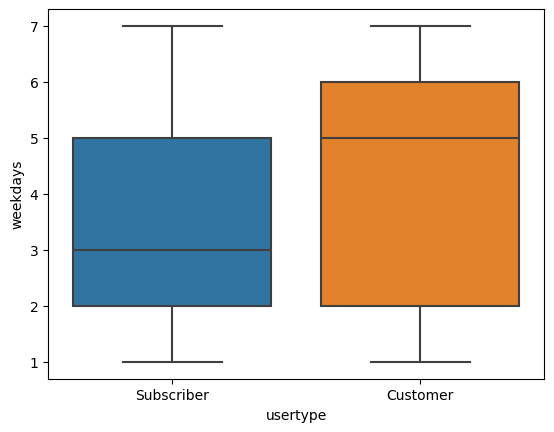

In [73]:
sns.boxplot(x='usertype',y='weekdays', data=df)

In [74]:
df['weekdays'].count()

637463

In [75]:
df.groupby('weekdays')['usertype'].count()

weekdays
1    105223
2    114561
3     98486
4    101479
5     95718
6     58404
7     63592
Name: usertype, dtype: int64

In [76]:
import matplotlib.pyplot as plt

<Axes: >

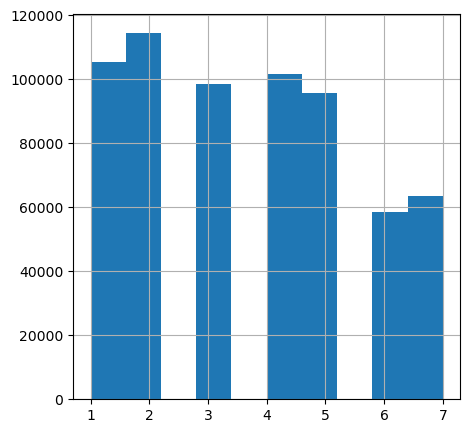

In [79]:
plt.figure(figsize=(5,5))
df['weekdays'].hist()

In [83]:
df.groupby('usertype')['month'].mean()

usertype
Customer      10.451274
Subscriber    10.728708
Name: month, dtype: float64

In [84]:
df.groupby('usertype')['weekdays'].mean()

usertype
Customer      4.414909
Subscriber    3.563931
Name: weekdays, dtype: float64

<Axes: xlabel='weekdays', ylabel='count'>

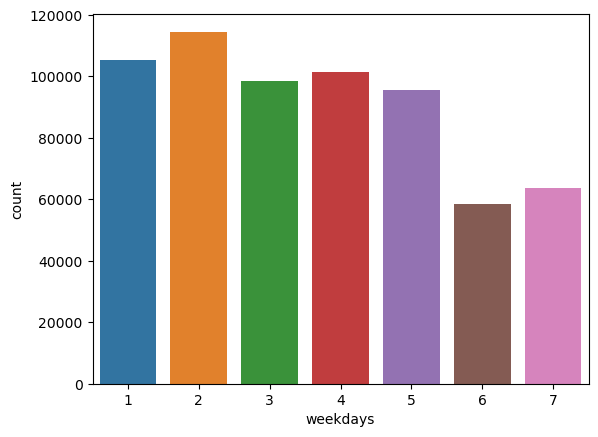

In [85]:
sns.countplot(x='weekdays', data=df)

<Axes: >

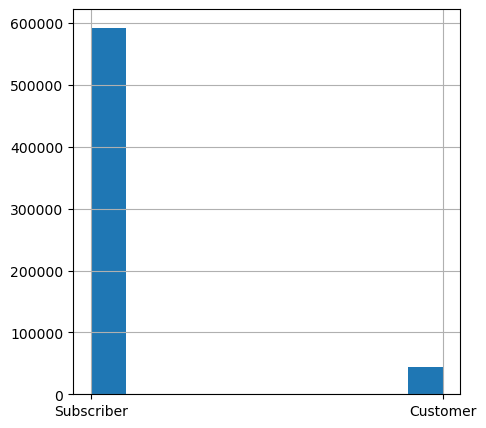

In [86]:
plt.figure(figsize=(5,5))
df['usertype'].hist()

<Axes: xlabel='weekdays', ylabel='usertype'>

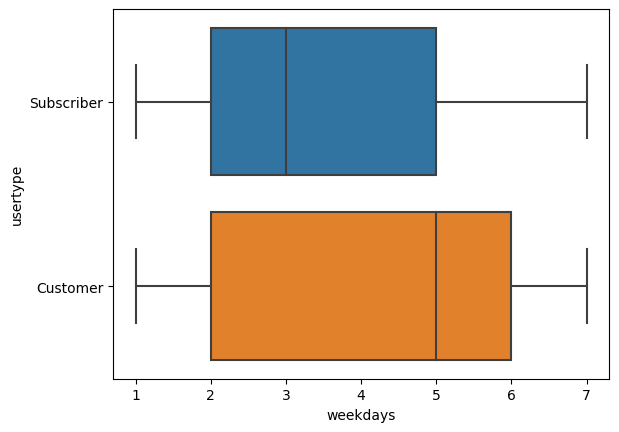

In [88]:
sns.boxplot(x='weekdays',y='usertype', data=df)